<div class="usecase-title">Population Growth & Active Transportation Needs Analysis</div>

<div class="usecase-authors"><b>Authored by: </b> Rhutuvaruni Kharade</div>

<div class="usecase-duration"><b>Duration:</b> {90} mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>{Intermediate}</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>{Python, and add any more skills needed}</div>
</div>

<div class="usecase-section-header">Scenario</div>

The aim of this usecase is to conduct a comprehensive analysis of population growth trends across different regions within the City of Melbourne. The objective is to discern potential needs for enhancements in transportation services across various modes available throughout the city. As population densities evolve, ensuring commensurate provisions of stations and stops becomes imperative to facilitate public mobility to and from diverse locales. The overarching goal is to identify areas projected to experience significant population surges and to ascertain corresponding requirements for expanded transportation infrastructure in anticipation of such demographic shifts.


User Story:

As a city planner responsible for transportation infrastructure in Melbourne,
I want to analyze population growth trends across different regions within the c ty
so that I can identify areas projected to experience significant population surges.

<div class="usecase-section-header">What this use case will teach you</div>

At the end of this use case you will:
- Python 
- Machine Learning 
- Deep Learning
- Data analysis and visualization skills
- Insights about the datasets used in this project

<div class="usecase-section-header">Analyzing population growth and sufficient amount of transportation services. </div>

{Write your introduction here. Keep it concise. We're not after "War and Peace" but enough background information to inform the reader on the rationale for solving this problem or background non-technical information that helps explain the approach. You may also wish to give information on the datasets, particularly how to source those not being imported from the client's open data portal.}

Using "City of Melbourne Population Forecasts by Small Area 2021-2041" dataset we will look at the forecasted population growth based on various features like location, year and value. This will help us understand what has been forecasted population growth in particular locations for particular years and the value of the growth in those areas. Using "City Circle tram stops" dataset we will look into the existing tram stops based on the locations where they exist. This will give us an insight into the number of tram stops in particular location. Using geolocation we can visualize the exact location of these tram stops to aid us into pointing out potential locations for future tram stops. Using "Bus stops" dataset we can see the location of bus stops within Melbourne city, thsi data can aid us to understand the existing number of bus stops in particular locations and if there are need for any more in the future due to the growth in the population. Dataset "Metro Train Stations with accessibility information"  gives information about the number of metro stations in various location in Melborune city. This dataset also contains the geolocations of the existing metro stations and using this we can predict if more metro stations will be needed in the future due to the growth in population. The initial approach would be to get the basic information about the dataset and understand the features within each dataset. Later figuring out which features are necessary and discarding the rest that are uncessary and only add to the number of dimensionality of the data. Once the features are understood, the goal will be to clean and remove null values with appropriate tools and techniques. After cleaning, a initial basic visualition to understand the overall distributions of the featues and finding out any correlations amongst them. Finally, using machine learning models to predict the number of transportation services that might be needed to aid the population growth within the city in particular locations. Potenitally, using PowerBI to the convey insights to the stakeholders/business owners/policy makers to help them understand the rise in population and their need for public transportation services, thus helping them plan for such resources beforehand.     

<h3> Importing Libraries/ Packages </h3>
<ul>
    <li>This part will focus on importing necessary libraries. </li>
</ul>

In [3690]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from geopy.geocoders import Nominatim 
import requests
import pandas as pd 
from io import StringIO
from geopy.geocoders import ArcGIS
import folium
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')


<h3>Adding datasets</h3>

In [3691]:

# function to collect data 
def collect_data(dataset_id):
    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    dataset_id  = dataset_id
    format='csv'

    url = f'{base_url}{dataset_id}/exports/{format}'
    params = {
        'select': '*', 
        'limit' : -1, 
        'lang' : 'en', 
        'timezone' : 'UTC' 
    }

    response = requests.get(url,params=params)

    if response.status_code ==200:
        url_content = response.content.decode('utf-8')
        dataset = pd.read_csv(StringIO(url_content), delimiter=';')
        return dataset
    else:
        print(f"Request failed with status code: {response.status_code}")


In [3692]:
# population dataset 
dataset_id = 'city-of-melbourne-population-forecasts-by-small-area-2020-2040'
pop = collect_data(dataset_id)
print(len(pop))
pop.head()


17052


,geography,year,gender,age,value
0,City of Melbourne,2022,Female,Age 0-4,2212.0
1,City of Melbourne,2024,Female,Age 0-4,2818.0
2,City of Melbourne,2029,Female,Age 0-4,4310.0
3,City of Melbourne,2031,Female,Age 0-4,4736.0
4,City of Melbourne,2032,Female,Age 0-4,4931.0


In [3693]:
# tram stop dataset 
dataset_id = 'city-circle-tram-stops'
tram = collect_data(dataset_id)
print(len(tram))
tram.head(3)

28


,geo_point_2d,geo_shape,name,xorg,stop_no,mccid_str,xsource,xdate,mccid_int
0,"-37.81922319307822, 144.9614014008424","{""coordinates"": [144.9614014008424, -37.819223...",Market Street / Flinders Street,GIS Team,3,NaN,Mapbase,2011-10-18,3
1,"-37.821539117626855, 144.95356912978238","{""coordinates"": [144.95356912978238, -37.82153...",Victoria Police Centre / Flinders Street,GIS Team,D6,NaN,Mapbase,2011-10-18,6
2,"-37.815426586135686, 144.94512063442602","{""coordinates"": [144.94512063442602, -37.81542...",Central Pier / Harbour Esplanade,GIS Team,D2,NaN,Mapbase,2011-10-18,10


In [3694]:
# bus stop dataset 
dataset_id = 'bus-stops'
bus = collect_data(dataset_id)
print(len(bus))
bus.head(3)

309


,geo_point_2d,geo_shape,prop_id,addresspt1,addressp_1,asset_clas,asset_type,objectid,str_id,addresspt,asset_subt,model_desc,mcc_id,roadseg_id,descriptio,model_no
0,"-37.80384165792465, 144.93239283833262","{""coordinates"": [144.93239283833262, -37.80384...",0,76.819824,357,Signage,Sign - Public Transport,355,1235255,570648,NaN,Sign - Public Transport 1 Panel,1235255,21673,Sign - Public Transport 1 Panel Bus Stop Type 13,P.16
1,"-37.81548699581418, 144.9581794249902","{""coordinates"": [144.9581794249902, -37.815486...",0,21.561304,83,Signage,Sign - Public Transport,600,1231226,548056,NaN,Sign - Public Transport 1 Panel,1231226,20184,Sign - Public Transport 1 Panel Bus Stop Type 8,P.16
2,"-37.81353897396532, 144.95728334230756","{""coordinates"": [144.95728334230756, -37.81353...",0,42.177187,207,Signage,Sign - Public Transport,640,1237092,543382,NaN,Sign - Public Transport 1 Panel,1237092,20186,Sign - Public Transport 1 Panel Bus Stop Type 8,P.16


In [3695]:
# metro stations dataset 
dataset_id = 'metro-train-stations-with-accessibility-information'
metro = collect_data(dataset_id)
print(len(metro))
metro.head(3)

219


,geo_point_2d,geo_shape,he_loop,lift,pids,station
0,"-37.77839599999999, 145.031251","{""coordinates"": [145.031251, -37.7783959999999...",No,No,Dot Matrix,Alphington
1,"-37.86724899999996, 144.830604","{""coordinates"": [144.830604, -37.8672489999999...",No,No,LCD,Altona
2,"-37.761897999999974, 144.96056099999998","{""coordinates"": [144.96056099999998, -37.76189...",No,No,No,Anstey


<h3>Cleaning dataset</h3>

<h4>1. Getting basic information about the dataset like columns, non null values, datatypes and dimension </h4>

In [3696]:
# Population Dataset 
pop.info() 
print()
print(f"Num. of dimensions: {pop.shape}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17052 entries, 0 to 17051
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   geography  17052 non-null  object 
 1   year       17052 non-null  int64  
 2   gender     17052 non-null  object 
 3   age        17052 non-null  object 
 4   value      16989 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 666.2+ KB

Num. of dimensions: (17052, 5)


In [3697]:
# tram stop dataset 
tram.info()
print()
print(f"Num. of dimensions: {tram.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   geo_point_2d  28 non-null     object 
 1   geo_shape     28 non-null     object 
 2   name          28 non-null     object 
 3   xorg          28 non-null     object 
 4   stop_no       28 non-null     object 
 5   mccid_str     0 non-null      float64
 6   xsource       28 non-null     object 
 7   xdate         28 non-null     object 
 8   mccid_int     28 non-null     int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 2.1+ KB

Num. of dimensions: (28, 9)


In [3698]:
# metro stations datasetabs 
metro.info()

print()
print(f"Num. of dimensions: {metro.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   geo_point_2d  219 non-null    object
 1   geo_shape     219 non-null    object
 2   he_loop       219 non-null    object
 3   lift          219 non-null    object
 4   pids          219 non-null    object
 5   station       219 non-null    object
dtypes: object(6)
memory usage: 10.4+ KB

Num. of dimensions: (219, 6)


In [3699]:
# bus stop dataset information   
bus.info()
print()
print(f"Num. of dimensions: {bus.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   geo_point_2d  309 non-null    object 
 1   geo_shape     309 non-null    object 
 2   prop_id       309 non-null    int64  
 3   addresspt1    309 non-null    float64
 4   addressp_1    309 non-null    int64  
 5   asset_clas    309 non-null    object 
 6   asset_type    309 non-null    object 
 7   objectid      309 non-null    int64  
 8   str_id        309 non-null    int64  
 9   addresspt     309 non-null    int64  
 10  asset_subt    0 non-null      float64
 11  model_desc    309 non-null    object 
 12  mcc_id        309 non-null    int64  
 13  roadseg_id    309 non-null    int64  
 14  descriptio    309 non-null    object 
 15  model_no      309 non-null    object 
dtypes: float64(2), int64(7), object(7)
memory usage: 38.8+ KB

Num. of dimensions: (309, 16)


<h4>2. The summation of null values across features provides insights into the extent of missing data within each feature for a particular dataset   </h4>

In [3700]:
pop.isnull().sum() 

geography     0
year          0
gender        0
age           0
value        63
dtype: int64

In [3701]:
tram.isnull().sum()

geo_point_2d     0
geo_shape        0
name             0
xorg             0
stop_no          0
mccid_str       28
xsource          0
xdate            0
mccid_int        0
dtype: int64

In [3702]:
metro.isnull().sum()

geo_point_2d    0
geo_shape       0
he_loop         0
lift            0
pids            0
station         0
dtype: int64

In [3703]:
bus.isnull().sum()

geo_point_2d      0
geo_shape         0
prop_id           0
addresspt1        0
addressp_1        0
asset_clas        0
asset_type        0
objectid          0
str_id            0
addresspt         0
asset_subt      309
model_desc        0
mcc_id            0
roadseg_id        0
descriptio        0
model_no          0
dtype: int64

<h4>3. Handling null values </h4>

<p>Only need for Population, bus and tram dataset. No null values in metro dataset.</p>
<p>Population dataset </p>
<ul>
    <li>Finding out where (which row indexes) the null values in the dataset exist.</li>
    <li>As the data type of missing value columns is numeric, replacing with median</li>
    <li>Rechecking if missing values handled or not</li>
</ul>

In [3704]:
# All missing data is numerical hence can be replaced by median 
pop.loc[pop.value.isna(),:]     

# 5574 to 16921 (68 rows)- Mostly West Melbourne (industrial) values are missing

# finding what is the median value for observations from West Melbourne (Industrial) specifically as 
# most missing values are from this area/location alone 
median = float(pop.loc[pop.geography == "West Melbourne (Industrial)"].value.median())
print(median)

# Filling the missing values with median 
pop = pop.fillna(median)

# null val check
pop.isnull().sum()

# all missing values are handled successfully 


0.0


geography    0
year         0
gender       0
age          0
value        0
dtype: int64


<p>Tram dataset </p>
<ul>
    <li>Checking values in "mccid_str" columns to see potential replacement options.</li>
    <li>All values in the column are null so this column can be dropped altogether.</li>
    <li>Rechecking if missing values handled or not (Kernal run all cell required each time).</li>
</ul>

In [3705]:
# checkign which columns has missing values 
tram.isna().sum()

# mccid_str 
tram.mccid_str

# all data in this col is null so this entire col can be removed all together
tram = tram.drop(columns="mccid_str", axis=1, inplace=False)
tram.head(5)


,geo_point_2d,geo_shape,name,xorg,stop_no,xsource,xdate,mccid_int
0,"-37.81922319307822, 144.9614014008424","{""coordinates"": [144.9614014008424, -37.819223...",Market Street / Flinders Street,GIS Team,3,Mapbase,2011-10-18,3
1,"-37.821539117626855, 144.95356912978238","{""coordinates"": [144.95356912978238, -37.82153...",Victoria Police Centre / Flinders Street,GIS Team,D6,Mapbase,2011-10-18,6
2,"-37.815426586135686, 144.94512063442602","{""coordinates"": [144.94512063442602, -37.81542...",Central Pier / Harbour Esplanade,GIS Team,D2,Mapbase,2011-10-18,10
3,"-37.813414856197724, 144.94137823870162","{""coordinates"": [144.94137823870162, -37.81341...",New Quay Promenade / Docklands Drive,GIS Team,D10,Mapbase,2011-10-18,11
4,"-37.814591782869805, 144.94655055842398","{""coordinates"": [144.94655055842398, -37.81459...",Etihad Statium / La Trobe Street,GIS Team,D1,Mapbase,2011-10-18,13


In [3706]:
# null val check 
tram.isna().sum()

# all missing values handled successfuly

geo_point_2d    0
geo_shape       0
name            0
xorg            0
stop_no         0
xsource         0
xdate           0
mccid_int       0
dtype: int64


<p>Bus dataset </p>
<ul>
    <li>Checking values in "asset_subt" columns to see potential replacement options.</li>
</ul>

In [3707]:
bus.isna().sum()

# checkign the asset_subt column
bus.asset_subt

# all null values , so col can be removed 
bus = bus.drop(columns="asset_subt",axis=1,inplace=False )

In [3708]:
# null val check
bus.isna().sum()

geo_point_2d    0
geo_shape       0
prop_id         0
addresspt1      0
addressp_1      0
asset_clas      0
asset_type      0
objectid        0
str_id          0
addresspt       0
model_desc      0
mcc_id          0
roadseg_id      0
descriptio      0
model_no        0
dtype: int64

<h4>4. Removing unnecessary features/irrelevant observations/Outliers </h4>

<p>Population dataset </p>
<ul>
    <li>Removing "gender" and "age" column- Aim is to look at the overall growth in population, regardless of gender or age of population </li>
    <li>Scaling the "value" values. </li>
    <li><FONT COLOR="RED">SELF NOTE - (See if "geopgrpahy" column can be geocoded to see the exact location (latitude, longitude) where the values correspond to.) </li>
        <li><FONT COLOR="RED"> SELF NOTE -Find out what is the unit for the "value" columns - is it in ten thousands? millions?  </li>
</ul>

In [3709]:
pop=pop.drop_duplicates()

In [3710]:
pop=pop[pop.age == "Total population"]

In [3711]:
pop = pop.drop(columns=["gender", "age"], axis=1, inplace=False)

In [3712]:
# drop check
pop.head(10)

,geography,year,value
5620,City of Melbourne,2021,153674.0
5621,City of Melbourne,2025,178786.0
5622,City of Melbourne,2028,213048.0
5623,City of Melbourne,2029,223062.0
5624,City of Melbourne,2033,257702.0
5625,City of Melbourne,2038,291496.0
5626,City of Melbourne,2040,302903.0
5627,Carlton,2026,20743.0
5628,Carlton,2027,21679.0
5629,Carlton,2031,26375.0


In [3713]:
np.sort(pop.year.unique())

array([2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031,
       2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041],
      dtype=int64)

<p>Scaling population dataset so that the values are between the 0 to 1  </p>

In [3714]:
# min max scalign
pop.value = (pop.value - min(pop.value))/(max(pop.value) - min(pop.value))
pop.head()

# value is now scaled 

,geography,year,value
5620,City of Melbourne,2021,0.498634
5621,City of Melbourne,2025,0.580116
5622,City of Melbourne,2028,0.691288
5623,City of Melbourne,2029,0.723781
5624,City of Melbourne,2033,0.836179


In [3715]:
# pip install geopy

<p>Code to convert the names of locations into their corrsponding longitude and latitude</p>

In [3716]:
# this code takes too long and consumes resources  if unique() is removed


location = Nominatim(user_agent="Geopy Library")

main = {}   # the main list that collects latititude and longitude

for city in pop.geography.unique():
    city = str(city)

    try:
        city = str(city) + ",Victoria, Australia"     
        getLoc = location.geocode(city)
        main[city] = (getLoc.latitude,getLoc.longitude)
        # longitude.append(getLoc.longitude)
        print(getLoc.address)
    except:
        main[city] = (None, None)
        print(f"NOT FOUND : {city}")
        pass


City of Melbourne, Victoria, Australia
Carlton, Melbourne, City of Melbourne, Victoria, 3053, Australia
Docklands, Melbourne, City of Melbourne, Victoria, 3008, Australia
East Melbourne, Melbourne, City of Melbourne, Victoria, 3002, Australia
Kensington, Bellair Street, Kensington, Melbourne, City of Melbourne, Victoria, 3031, Australia
Melbourne, City of Melbourne, Victoria, Australia
NOT FOUND : Melbourne (Remainder),Victoria, Australia
North Melbourne, Dryburgh Street, West Melbourne, Melbourne, City of Melbourne, Victoria, 3003, Australia
Parkville, Melbourne, City of Melbourne, Victoria, 3052, Australia
Port Melbourne, Melbourne, City of Port Phillip, Victoria, 3207, Australia
South Yarra, Melbourne, City of Stonnington, Victoria, 3141, Australia
Southbank, Melbourne, City of Melbourne, Victoria, 3006, Australia
Australia Post Sunshine West PDC, 42, Industrial Drive, Sunshine West, Melbourne, City of Brimbank, Victoria, 3020, Australia
NOT FOUND : West Melbourne (Residential),Vict

In [3717]:
main

{'City of Melbourne,Victoria, Australia': (-37.8123825, 144.94826486608156),
 'Carlton,Victoria, Australia': (-37.8004228, 144.9684343),
 'Docklands,Victoria, Australia': (-37.8175423, 144.9394923),
 'East Melbourne,Victoria, Australia': (-37.812498, 144.9858851),
 'Kensington,Victoria, Australia': (-37.7939378, 144.9305645),
 'Melbourne (CBD),Victoria, Australia': (-37.8141705, 144.9655616),
 'Melbourne (Remainder),Victoria, Australia': (None, None),
 'North Melbourne,Victoria, Australia': (-37.8076092, 144.9423514),
 'Parkville,Victoria, Australia': (-37.7871148, 144.9515533),
 'Port Melbourne,Victoria, Australia': (-37.8333613, 144.9219203),
 'South Yarra,Victoria, Australia': (-37.8377695, 144.9918537),
 'Southbank,Victoria, Australia': (-37.8253618, 144.9640203),
 'West Melbourne (Industrial),Victoria, Australia': (-37.8083671,
  144.81306234897477),
 'West Melbourne (Residential),Victoria, Australia': (None, None)}

<p>Tram dataset </p>
<ul>
    <li>Removing xorg, xsource, mccid_int, xdate column - None of these columns are useful as tehy dont give information about the location of tram stop itself.  </li>
    <li>Seperated the geo_shape_2d column into latitude and longitude and later dropped it. </li>
    
</ul>

In [3718]:
tram = tram.drop(columns=["xorg", "xsource", "xdate", "mccid_int", "stop_no"], inplace=False, axis=1 )

In [3719]:
# drop check
tram.head(10)

,geo_point_2d,geo_shape,name
0,"-37.81922319307822, 144.9614014008424","{""coordinates"": [144.9614014008424, -37.819223...",Market Street / Flinders Street
1,"-37.821539117626855, 144.95356912978238","{""coordinates"": [144.95356912978238, -37.82153...",Victoria Police Centre / Flinders Street
2,"-37.815426586135686, 144.94512063442602","{""coordinates"": [144.94512063442602, -37.81542...",Central Pier / Harbour Esplanade
3,"-37.813414856197724, 144.94137823870162","{""coordinates"": [144.94137823870162, -37.81341...",New Quay Promenade / Docklands Drive
4,"-37.814591782869805, 144.94655055842398","{""coordinates"": [144.94655055842398, -37.81459...",Etihad Statium / La Trobe Street
5,"-37.812487918072826, 144.95393532833103","{""coordinates"": [144.95393532833103, -37.81248...",King Street / La Trobe Street
6,"-37.8081489607039, 144.96879323779422","{""coordinates"": [144.96879323779422, -37.80814...",Exhibition Street / La Trobe Street
7,"-37.81538859129167, 144.97453393804187","{""coordinates"": [144.97453393804187, -37.81538...",Spring Street / Flinders Street
8,"-37.81614537491179, 144.97196946163052","{""coordinates"": [144.97196946163052, -37.81614...",Exhibition Street / Flinders Street
9,"-37.82023778673241, 144.95786314283018","{""coordinates"": [144.95786314283018, -37.82023...",Melbourne Aquarium / Flinders Street


In [3720]:
# seperating the geolocation columns
tram[["lat_tram", "lon_tram"]] = tram.geo_point_2d.str.split(',', expand=True).astype(float)
# tram.head(5)
tram = tram.drop(columns=["geo_point_2d", "geo_shape"], inplace=False, axis=1)


# renaming the name column to tram_stop_name to be more specific
tram = tram.rename(columns={"name":"stop_name"})

In [3721]:
# final check 
tram.head(10)

,stop_name,lat_tram,lon_tram
0,Market Street / Flinders Street,-37.819223,144.961401
1,Victoria Police Centre / Flinders Street,-37.821539,144.953569
2,Central Pier / Harbour Esplanade,-37.815427,144.945121
3,New Quay Promenade / Docklands Drive,-37.813415,144.941378
4,Etihad Statium / La Trobe Street,-37.814592,144.946551
5,King Street / La Trobe Street,-37.812488,144.953935
6,Exhibition Street / La Trobe Street,-37.808149,144.968793
7,Spring Street / Flinders Street,-37.815389,144.974534
8,Exhibition Street / Flinders Street,-37.816145,144.971969
9,Melbourne Aquarium / Flinders Street,-37.820238,144.957863


<p>Bus dataset </p>
<ul>
    <li>Removing prop_id, asset_clas, objectid, str_id, model_desc, mcc_id, roadseg_id, model_no column - None of these columns are useful as they dont give information about the location of the bus stop itself.  </li>
    <li>Seperated the geo_shape_2d column into latitude and longitude and later dropped it. </li>
    
</ul>

In [3722]:
bus = bus.drop(columns= [
    "prop_id", 
    "asset_clas", 
    'asset_type', 
    'str_id', 
    'model_desc',
    'mcc_id', 
    "roadseg_id", 
    "model_no",
    "addresspt1", 
    "addressp_1",
    "objectid",
    "addresspt", 
    "descriptio"
], inplace=False, axis=1)

In [3723]:
bus.head(10)

,geo_point_2d,geo_shape
0,"-37.80384165792465, 144.93239283833262","{""coordinates"": [144.93239283833262, -37.80384..."
1,"-37.81548699581418, 144.9581794249902","{""coordinates"": [144.9581794249902, -37.815486..."
2,"-37.81353897396532, 144.95728334230756","{""coordinates"": [144.95728334230756, -37.81353..."
3,"-37.82191394843844, 144.95539345270072","{""coordinates"": [144.95539345270072, -37.82191..."
4,"-37.83316401267591, 144.97443745130263","{""coordinates"": [144.97443745130263, -37.83316..."
5,"-37.79436108568101, 144.92998424529242","{""coordinates"": [144.92998424529242, -37.79436..."
6,"-37.817452093555325, 144.96168480565794","{""coordinates"": [144.96168480565794, -37.81745..."
7,"-37.82146476463953, 144.9303191551562","{""coordinates"": [144.9303191551562, -37.821464..."
8,"-37.837547087144706, 144.98191138368836","{""coordinates"": [144.98191138368836, -37.83754..."
9,"-37.812490976626215, 144.95370614040704","{""coordinates"": [144.95370614040704, -37.81249..."


In [3724]:
# seperating the geo_point_2d to lat and lon column 
bus[["lat_bus", "lon_bus"]] =  bus.geo_point_2d.str.split(',', expand=True).astype(float)
# drop the original cols 
bus = bus.drop(columns=["geo_point_2d", "geo_shape"], inplace=False, axis=1)

In [3725]:
bus.head(10)

,lat_bus,lon_bus
0,-37.803842,144.932393
1,-37.815487,144.958179
2,-37.813539,144.957283
3,-37.821914,144.955393
4,-37.833164,144.974437
5,-37.794361,144.929984
6,-37.817452,144.961685
7,-37.821465,144.930319
8,-37.837547,144.981911
9,-37.812491,144.953706


<p>Metro dataset </p>
<ul>
    <li>Removing pids, he_loop, lift column - None of these columns are useful as they dont give information about the location of the metro station.  </li>
    <li>Seperated the geo_shape_2d column into latitude and longitude and later dropped it. </li>
</ul>

In [3726]:
metro[["lat_metro", "lon_metro"]] =  metro.geo_point_2d.str.split(',', expand=True).astype(float)
# drop the original cols 
metro = metro.drop(columns=["geo_point_2d", "geo_shape", "he_loop", "lift", "pids"], inplace=False, axis=1)
# renamign col
metro = metro.rename(columns={"station":"station_name"})

In [3727]:
# check updates
metro.head(10)

,station_name,lat_metro,lon_metro
0,Alphington,-37.778396,145.031251
1,Altona,-37.867249,144.830604
2,Anstey,-37.761898,144.960561
3,Auburn,-37.822411,145.045617
4,Batman,-37.733459,144.962747
5,Beaconsfield,-38.050928,145.366045
6,Bell,-37.745568,145.000181
7,Berwick,-38.039681,145.344973
8,Box Hill,-37.819274,145.121800
9,Burwood,-37.851351,145.080368


In [3728]:
# final shapes of all datasets 
print(f"Shape of population dataset: {pop.shape}")
print(f"Shape of bus stops dataset: {bus.shape}")
print(f"Shape of tram stop dataset: {tram.shape}")
print(f"Shape of metro stations dataset: {metro.shape}")

Shape of population dataset: (294, 3)
Shape of bus stops dataset: (309, 2)
Shape of tram stop dataset: (28, 3)
Shape of metro stations dataset: (219, 3)


<h3>Visualizations </h3>

<p>Population dataset </p>
<ul>
    <li><FONT COLOR="RED"> SELF NOTE -Facing issues with nonetype objects for two locations (Melbourne (Remainder),Victoria, Australia' and 'West Melbourne (Residential),Victoria, Australia)  </li>
</ul>

In [3729]:
pop

,geography,year,value
5620,City of Melbourne,2021,0.498634
5621,City of Melbourne,2025,0.580116
5622,City of Melbourne,2028,0.691288
5623,City of Melbourne,2029,0.723781
5624,City of Melbourne,2033,0.836179
...,...,...,...
17047,West Melbourne (Residential),2033,0.044314
17048,West Melbourne (Residential),2034,0.046238
17049,West Melbourne (Residential),2036,0.048126
17050,West Melbourne (Residential),2037,0.048198


In [3730]:
geolocator = Nominatim(user_agent="location_details")

new_df = pd.DataFrame()

city_list = list()
lat_list = list()
long_list = list()

for city in pop.geography.unique():
    city = f"{city}, Victoria, Australia"
    try: 
        location = geolocator.geocode(city)
        # print((location.address,  location.latitude, location.longitude))
        lat_list.append(location.latitude)
        long_list.append(location.longitude)
        # print()
        city_list.append(location.address.split(",")[0])
        map=folium.Map(location=[location.latitude, location.longitude],zoom_start=15)
        map.add_child(folium.Marker(location=[location.latitude, location.longitude],popup=location,icon=folium.Icon(color='blue')))
        
    except:
        print(f"CITY NOT FOUND: {city}")
        

new_df['geography'] = np.array(city_list)
new_df['city_lat']   = np.array(lat_list)
new_df['city_long'] = np.array(long_list)


new_df
pop_lat_long = new_df
pop_lat_long
# location = geolocator.geocode("Carlton, Victoria, Australia")
# print((location.latitude, location.longitude))



CITY NOT FOUND: Melbourne (Remainder), Victoria, Australia
CITY NOT FOUND: West Melbourne (Residential), Victoria, Australia


,geography,city_lat,city_long
0,City of Melbourne,-37.812382,144.948265
1,Carlton,-37.800423,144.968434
2,Docklands,-37.817542,144.939492
3,East Melbourne,-37.812498,144.985885
4,Kensington,-37.793938,144.930565
5,Melbourne,-37.814171,144.965562
6,North Melbourne,-37.807609,144.942351
7,Parkville,-37.787115,144.951553
8,Port Melbourne,-37.833361,144.921920
9,South Yarra,-37.837770,144.991854


In [3731]:
city_names = list(pop.geography.unique())
# city_names

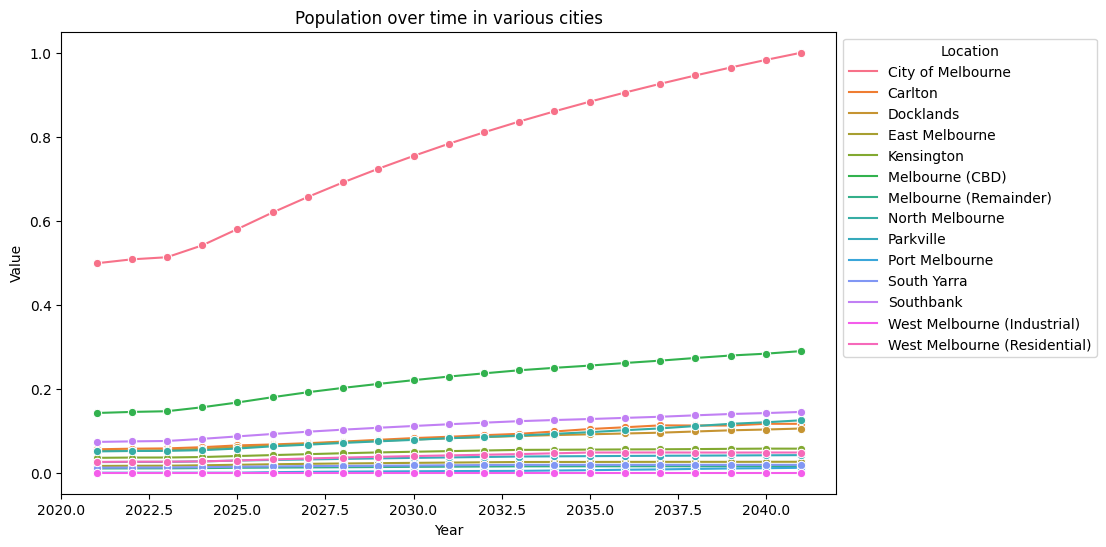

In [3732]:
x = pop[pop.geography.isin(city_names)]


plt.figure(figsize=(10,6))
plot= sns.lineplot(data=x, x='year', y='value', hue='geography', marker='o')
plt.title('Population over time in various cities')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(title='Location')
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1))

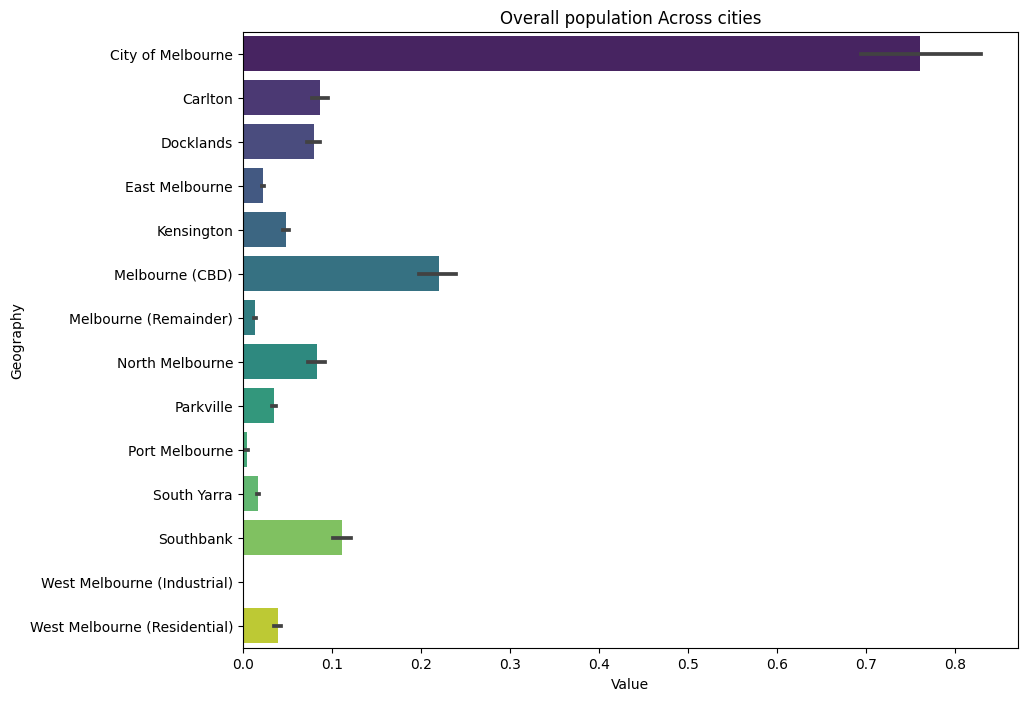

In [3733]:
# bar plot 
plt.figure(figsize=(10, 8))
sns.barplot(data=pop, x='value', y='geography', palette='viridis')
plt.title(f'Overall population Across cities')
plt.xlabel('Value')
plt.ylabel('Geography')
plt.show()

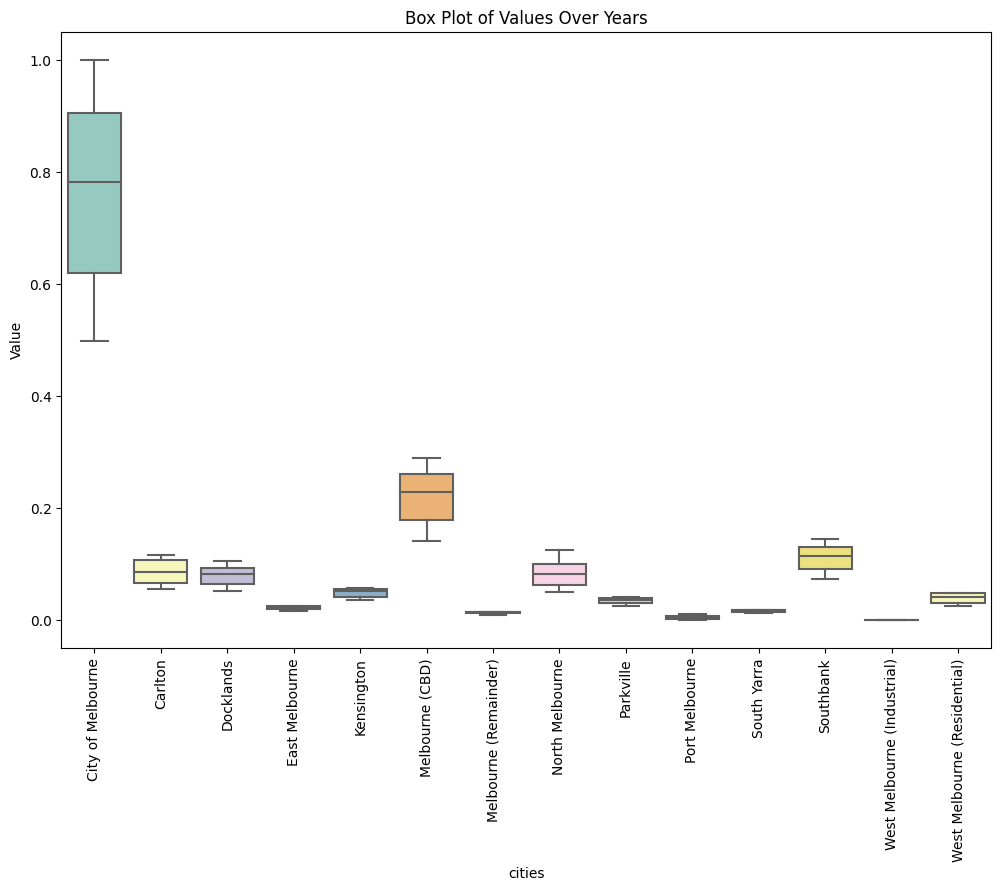

In [3734]:
# Plotting box plot using seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(data=pop, x='geography', y='value', palette='Set3')
plt.title('Box Plot of Values Over Years')
plt.xlabel('cities')
plt.xticks(rotation=90)
plt.ylabel('Value')
plt.show()

<p>Tram dataset </p>
<ul>
    Initial visualization to see locations of tram stops 
</ul>

In [3735]:
tram.head(3)

,stop_name,lat_tram,lon_tram
0,Market Street / Flinders Street,-37.819223,144.961401
1,Victoria Police Centre / Flinders Street,-37.821539,144.953569
2,Central Pier / Harbour Esplanade,-37.815427,144.945121


In [3736]:
import folium

map = folium.Map(location = [tram["lat_tram"].iloc[0], tram["lon_tram"].iloc[0]], zoom_start=-1)

for i, rows in tram.iterrows():
    folium.Marker(location=[rows["lat_tram"], rows["lon_tram"]], tooltip=rows['stop_name']).add_to(map)

min_val = tram[['lat_tram', 'lon_tram']].min().values.tolist()
max_val = tram[['lat_tram', 'lon_tram']].max().values.tolist()

map.fit_bounds([min_val, max_val]) 


map

<p>Metro station dataset </p>
<ul>
    Initial visualization to see locations of metro station stops 
</ul>

In [3737]:
metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   station_name  219 non-null    object 
 1   lat_metro     219 non-null    float64
 2   lon_metro     219 non-null    float64
dtypes: float64(2), object(1)
memory usage: 5.3+ KB


In [3738]:
map = folium.Map(location = [metro["lat_metro"].iloc[0], metro["lon_metro"].iloc[0]], zoom_start=10)

for i, rows in metro.iterrows():
    folium.Marker(location=[rows["lat_metro"], rows["lon_metro"]], tooltip=rows['station_name']).add_to(map)

min_val = metro[['lat_metro', 'lon_metro']].min().values.tolist()
max_val = metro[['lat_metro', 'lon_metro']].max().values.tolist()

map.fit_bounds([min_val, max_val]) 


map

In [3739]:
bus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lat_bus  309 non-null    float64
 1   lon_bus  309 non-null    float64
dtypes: float64(2)
memory usage: 5.0 KB


<p>Bus stop dataset </p>
<ul>
    Initial visualization to see locations of bus stops 
</ul>

In [3740]:
map = folium.Map(location = [bus["lat_bus"].iloc[0], bus["lon_bus"].iloc[0]], zoom_start=10)

for i, rows in bus.iterrows():
    folium.Marker(location=[rows["lat_bus"], rows["lon_bus"]]).add_to(map)

min_val = bus[['lat_bus', 'lon_bus']].min().values.tolist()
max_val = bus[['lat_bus', 'lon_bus']].max().values.tolist()

map.fit_bounds([min_val, max_val]) 


map

As the data for Tram stops is not sufficient we will no longer use tram data 

In [3741]:
# combining transport and popualtion map 
map = folium.Map(zoom_start=10)

# to show the bus stops
for i, rows in bus.iterrows():
    folium.Marker(location=[rows["lat_bus"], rows["lon_bus"]],icon=folium.Icon(color='blue')).add_to(map)

# To show teh metro stops
for i, rows in metro.iterrows():
    folium.Marker(location=[rows["lat_metro"], rows["lon_metro"]], icon=folium.Icon(color='orange')).add_to(map)


for i, rows in pop_lat_long.iterrows():
    folium.Marker(location=[rows["city_lat"], rows["city_long"]], icon=folium.Icon(color='green')).add_to(map)



min_val = bus[['lat_bus', 'lon_bus']].min().values.tolist()
max_val = bus[['lat_bus', 'lon_bus']].max().values.tolist()

map.fit_bounds([min_val, max_val]) 


map

<h2>Preprocessing </h2>

<p>Preprocessing data so it can be fed into models and networks </p>

<h4> Population  </h4>

<p> Expanding the population datasets so that we can see the population for each year in particular city.  </p>

In [3742]:
pop=pop.pivot_table(index="year", columns="geography", values="value", aggfunc='first')
# pop.head(5)

merging population column with the dataset that we previously worked on to find the latitude and longitudea of each geographic location so that the last two columns of population datasets reflect the lattitude and longitude of those locations/places 

In [3743]:
pop.head(5)

geography,Carlton,City of Melbourne,Docklands,East Melbourne,Kensington,Melbourne (CBD),Melbourne (Remainder),North Melbourne,Parkville,Port Melbourne,South Yarra,Southbank,West Melbourne (Industrial),West Melbourne (Residential)
year,,,,,,,,,,,,,,
2021,0.055761,0.498634,0.051676,0.016120,0.035475,0.142201,0.010127,0.050790,0.025351,0.000032,0.012057,0.073296,0.0,0.025747
2022,0.057202,0.508040,0.052636,0.016519,0.036072,0.144739,0.010302,0.051715,0.025708,0.000032,0.012281,0.074626,0.0,0.026205
2023,0.057886,0.513070,0.053334,0.016694,0.036234,0.146416,0.010386,0.052030,0.025789,0.000032,0.012434,0.075551,0.0,0.026289
2024,0.060771,0.541296,0.057046,0.017697,0.037344,0.155845,0.010971,0.053701,0.026948,0.000036,0.013239,0.080619,0.0,0.027077
2025,0.065028,0.580116,0.061157,0.018923,0.039738,0.167209,0.011772,0.057585,0.028982,0.000039,0.014193,0.086469,0.0,0.029028


Dropping the "City of Melbourne" row as it not one of the locations in CLUE small area as seen here -
https://www.melbourne.vic.gov.au/sitecollectiondocuments/clue-small-area-block-map.pdf

In [3744]:
pop=pop.drop(['City of Melbourne'],axis=1)

In [3745]:
pop.head(5)

geography,Carlton,Docklands,East Melbourne,Kensington,Melbourne (CBD),Melbourne (Remainder),North Melbourne,Parkville,Port Melbourne,South Yarra,Southbank,West Melbourne (Industrial),West Melbourne (Residential)
year,,,,,,,,,,,,,
2021,0.055761,0.051676,0.016120,0.035475,0.142201,0.010127,0.050790,0.025351,0.000032,0.012057,0.073296,0.0,0.025747
2022,0.057202,0.052636,0.016519,0.036072,0.144739,0.010302,0.051715,0.025708,0.000032,0.012281,0.074626,0.0,0.026205
2023,0.057886,0.053334,0.016694,0.036234,0.146416,0.010386,0.052030,0.025789,0.000032,0.012434,0.075551,0.0,0.026289
2024,0.060771,0.057046,0.017697,0.037344,0.155845,0.010971,0.053701,0.026948,0.000036,0.013239,0.080619,0.0,0.027077
2025,0.065028,0.061157,0.018923,0.039738,0.167209,0.011772,0.057585,0.028982,0.000039,0.014193,0.086469,0.0,0.029028


In [3746]:
new_pop = pop.copy()

In [3747]:
pop.columns = pop.columns.astype(str)   # to change teh column names to type stirng 

In [3748]:
pop=pop.reset_index()

In [3749]:
# formatting the year column as datetime and setting it as index
pop.year = pd.to_datetime(pop.year, format="%Y")
pop.set_index('year', inplace =True)

In [3750]:
pop=pop.loc[:, ['Carlton', 'Docklands', 'East Melbourne', 'Kensington','Melbourne (CBD)', 'Melbourne (Remainder)', 'North Melbourne', 'Parkville', 'Port Melbourne', 'South Yarra', 'Southbank','West Melbourne (Residential)']]

pop.head(3)

geography,Carlton,Docklands,East Melbourne,Kensington,Melbourne (CBD),Melbourne (Remainder),North Melbourne,Parkville,Port Melbourne,South Yarra,Southbank,West Melbourne (Residential)
year,,,,,,,,,,,,
2021-01-01,0.055761,0.051676,0.016120,0.035475,0.142201,0.010127,0.050790,0.025351,0.000032,0.012057,0.073296,0.025747
2022-01-01,0.057202,0.052636,0.016519,0.036072,0.144739,0.010302,0.051715,0.025708,0.000032,0.012281,0.074626,0.026205
2023-01-01,0.057886,0.053334,0.016694,0.036234,0.146416,0.010386,0.052030,0.025789,0.000032,0.012434,0.075551,0.026289


<h2>Models</h2>
<h3>Part A: Population Dataset</h3>

<h4> 1. ARIMA Model</h4>
<p> ARIMA models are used to handle time series data and it helps in predicting future values based on the past values. As we have yearly data about the population from year 2021 to 2041 for each city in Small Area CLUE population dataset, using ARIMA would be a good start to help use create a model that can predict the values for future years based on the current data. </p>
<ul>
    <li><b>AR (Auto Regression) - </b>This explains the relationship between the current observation and the lagged observation </li>
    <li><b>I (Integrated)- </b> In order to achieve a stationary series we apply differencing so that we dont have trends or seasionality. </li>
    <li><b>MA (Moving Average) - </b>This component helps us understand the relationship between an observation and the residual error from moving average model based on lagged observations. (Jason Brownlee 2017)</li>
</ul>

<p><b>General approach explained/shown below</b></p>

In [3751]:
pop.head(5)

geography,Carlton,Docklands,East Melbourne,Kensington,Melbourne (CBD),Melbourne (Remainder),North Melbourne,Parkville,Port Melbourne,South Yarra,Southbank,West Melbourne (Residential)
year,,,,,,,,,,,,
2021-01-01,0.055761,0.051676,0.016120,0.035475,0.142201,0.010127,0.050790,0.025351,0.000032,0.012057,0.073296,0.025747
2022-01-01,0.057202,0.052636,0.016519,0.036072,0.144739,0.010302,0.051715,0.025708,0.000032,0.012281,0.074626,0.026205
2023-01-01,0.057886,0.053334,0.016694,0.036234,0.146416,0.010386,0.052030,0.025789,0.000032,0.012434,0.075551,0.026289
2024-01-01,0.060771,0.057046,0.017697,0.037344,0.155845,0.010971,0.053701,0.026948,0.000036,0.013239,0.080619,0.027077
2025-01-01,0.065028,0.061157,0.018923,0.039738,0.167209,0.011772,0.057585,0.028982,0.000039,0.014193,0.086469,0.029028


In [3752]:
# first we choose one area in our dataset, lets say Carlton for simplicity 
data = pop.Carlton
data.head(5)

year
2021-01-01    0.055761
2022-01-01    0.057202
2023-01-01    0.057886
2024-01-01    0.060771
2025-01-01    0.065028
Name: Carlton, dtype: float64

<p>We check for stationarity here, as stationarity tells us if the data we are working on is stationary or not. A time series is stationary if all the statistical properties like mean, variance and correlation are constant over time. A stationary series does not have a trend or seasional effects and its fluctuation around the mean is constant. 
    
The stationarity is checked for model accuracy as most time series forecasting methods assume that our models are stationary. Moreover stationary data is easy to model and predictions made on such a model are reliable as the future values have the same mean and variance as past values.  (Duke University 2024)</p>

In [3753]:
# Checking for stationarity 
result = adfuller(data.dropna())
print(f"ADF Statistics: {result[0]}")
print(f"p-value:{result[1]}")

ADF Statistics: -2.5131706971973995
p-value:0.11230255104868042


<p>ADF test tells us the ADF statistics and p-value. The Augmented Dickey-Fuller Test, tests for unit root in time series which indicated the data is non-stationary and hence is affected by trends. 

Null Hypothesis: The series has unit root or it is non-stationary
Alternative Hypothesis: The series has no unit root or it is stationary

As our p-value (0.1123) is not below 0.05 we cannot reject null hypthesis and this means that our data is not stationary and hence we will make it stationary in following lines of codes below. 

The ADF statistics suggest that the higher the negative value, the stronger the evidence to not reject null hypothesis, as seen above we have a negative value hence proving strongly that we cannot reject the null hypothsis. </p>

In [3754]:
# applying differencing
data = data.diff().dropna()

diff_results = adfuller(data)
print(f"ADF Statistics: {diff_results[0]}")
print(f"p-value:{diff_results[1]}")

ADF Statistics: -1.302036050028587
p-value:0.6282403042610456


<p>Now the data is staionary as the p-value is below 0.05</p>

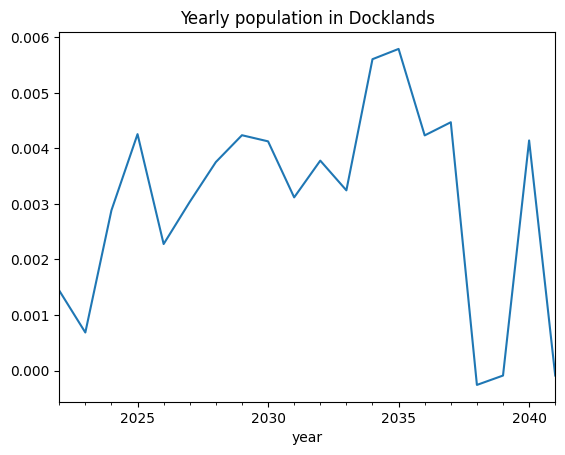

In [3755]:
data.plot()
plt.title('Yearly population in Docklands')
plt.show()

2042-01-01    0.001606
2043-01-01    0.001054
2044-01-01    0.001233
2045-01-01    0.001175
2046-01-01    0.001194
Freq: AS-JAN, Name: predicted_mean, dtype: float64


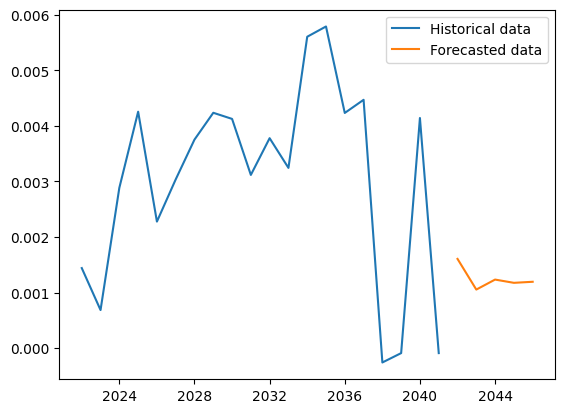

In [3756]:
# defining the ARIMA model 
model =ARIMA(data,order=(1,1,1))

# fitting
fitted = model.fit()

# forecasting 
forecast = fitted.forecast(steps=5)
print(forecast)

# plot 
plt.plot(data.index, data,label="Historical data")
plt.plot(forecast.index, forecast, label="Forecasted data")
plt.legend()
plt.show()

<p><b>Main function that perform ARIMA on all cities and plots the result</b></p>

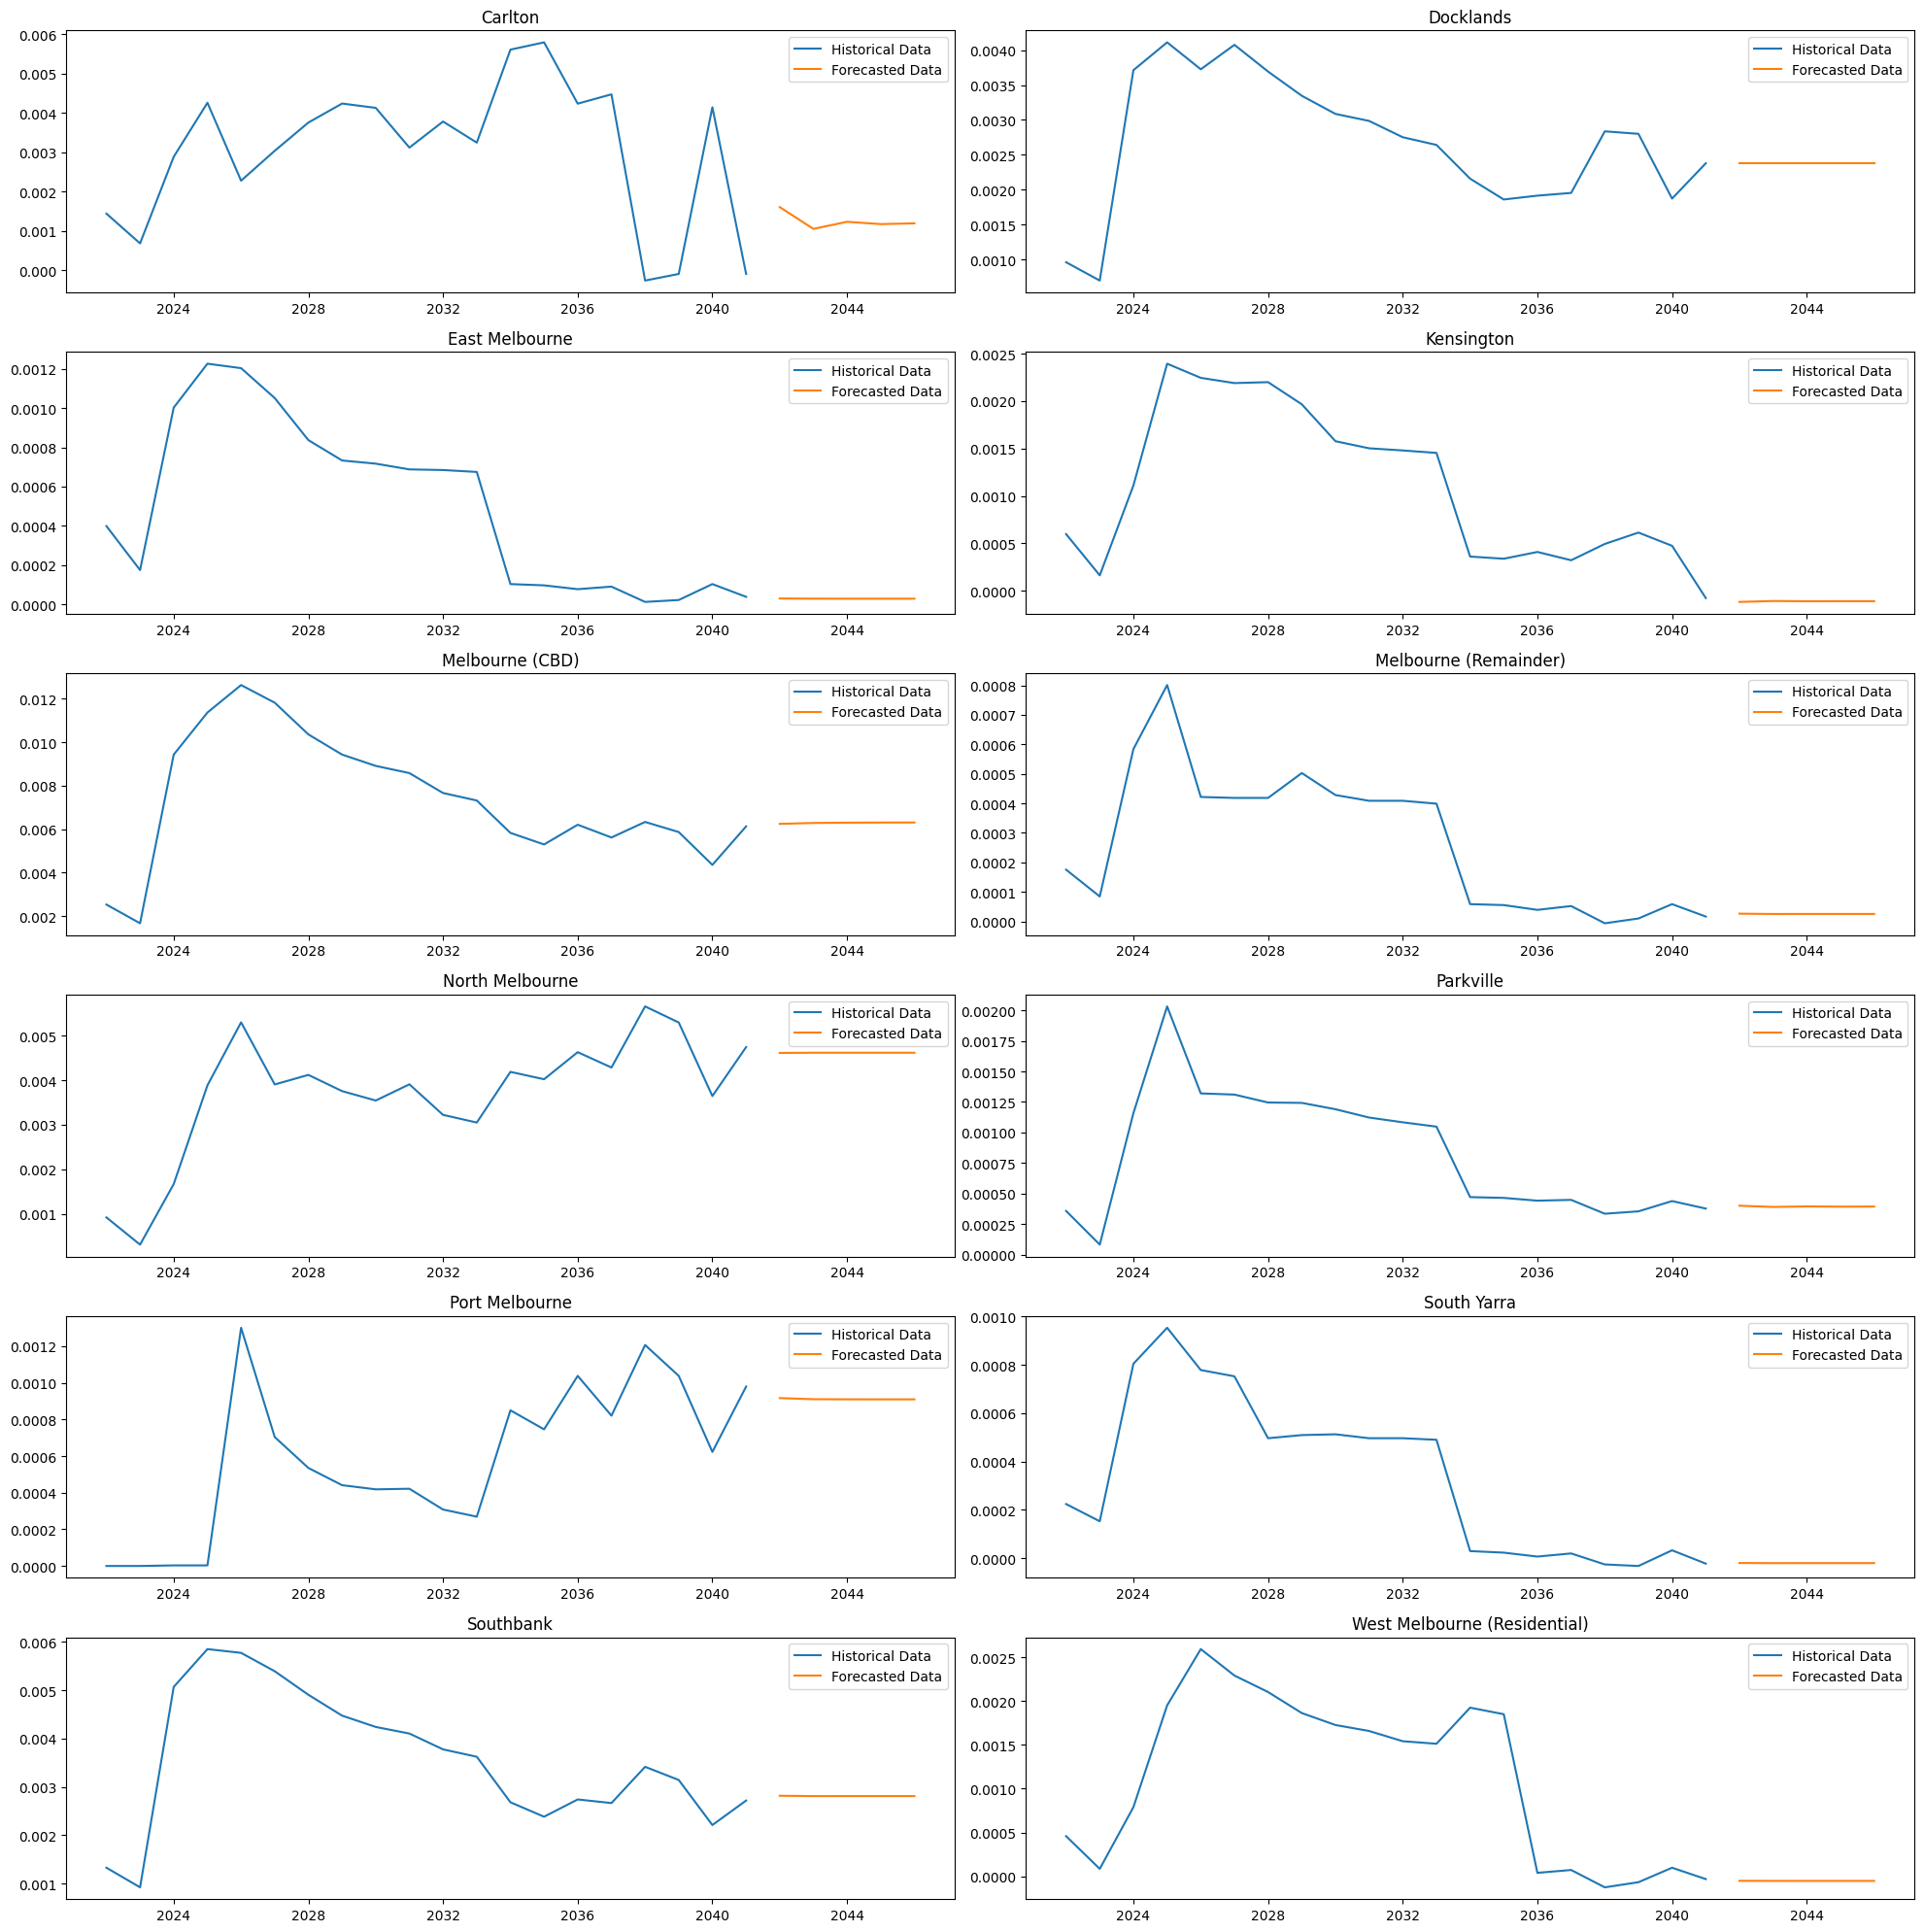

In [3757]:
# All functions 

def plot(data, forecast, city_name):
    fig, axs = plt.subplots(6, 2, figsize=(20, 20))
    
    for i in range(12):
        row = i // 2  # row index
        col = i % 2   # column index
    
        axs[row, col].plot(new_data[i].index, new_data[i], label="Historical Data")
        axs[row, col].plot(new_forecast[i].index, new_forecast[i], label="Forecasted Data")
        axs[row, col].set_title(new_city_name[i])
        axs[row, col].legend()  
    plt.tight_layout()
    plt.show()

        
    

def model_arima(data):
    # defining the ARIMA model 
    model =ARIMA(data,order=(1,1,1))
    
    # fitting
    fitted = model.fit()
    
    # forecasting 
    forecast = fitted.forecast(steps=5)
    # print(forecast)
    return (data, forecast)




def main():  
    colname = pop.columns

    # empty lists to use later
    dict_adf_and_p = {}  # self explanatory 
    new_data_list = [] 
    forecast_list = []
    city_name_list = []
    
    for i in range(pop.shape[1]):
        data = pop.iloc[:, i]
        city_name = colname[i]
        city_name_list.append(city_name)
        # print(city_name)
        result = adfuller(data)
        adf = result[0]
        p = result[1]

        # if the p values is > 0.05 we make the stationarize it using diff() or else both diff to stationarize and log to transoform to see hideen patterns in data 
        if p > 0.05:
            data = data.diff().dropna()
            results = adfuller(data)
            adf = result[0]
            p = result[1]
            dict_adf_and_p[city_name] = [adf,p]
        else:
            data = data.diff().dropna()
            data = np.log(data + 1)
            results = adfuller(data)
            adf = result[0]
            p = result[1]
            dict_adf_and_p[city_name] = [adf,p]
                         
            
        new_data, forecast = model_arima(data)
        new_data_list.append(new_data)
        forecast_list.append(forecast)
    return new_data_list,forecast_list, city_name_list 



new_data, new_forecast, new_city_name = main()  
plot(new_data, new_forecast, new_city_name)




<p><b>Key findings from the plot. </b></p>
<ul>
    <li><b>1. Historical Data Trends:</b> Most areas show some level of fluctuations in the populations from the year 2021 to 2041 (historical data). Areas like Carlton, East Melbourne and Port Melbourne show significant changes over the years while others like Docklands, Melbourne CBD and Southbank show gradual decrease in population in coming years. We can see a general decline in population in cities like South Yarra, West Melbourne (Residential), Parkville, Melbourne(Remainder) and East Melbourne. Cities like Carlton, North Melbourne and Port Melbourne have complex changes in population as it decreases and then increases in following years. </li><br>
    <li><b>2. Forecasted Data:</b> For most areas the forecasted data sees no significant change in population from the historical point. This might indicate that the recent trends are a good indication of future trends with no significant changes.  </li>
</ul>

<h4> 2. Linear Regression</h4>
<p> Linear Regression on population dataset will allow us to understand the population growth in different geographic areas. We expect the growth to be a linear trend in over time over time as long as there isnt drastic demographic shifts. Through linear regression we will be able to estimate the rate of population increase and decrease in various cities as a function of time. This will help us gain more insights on top of the results achieved previously through ARIMA model. To understand how well our training set is performing against the new test data we use metrics like Mean squared Error (MSE) and R-squared.  MSE meaasures the average squared difference between the actual observed values and the values predicted by the model. Lower MSE indicates that the model's predictions are closer to the actual data points and hence the model will show better fit for the unknown newer data. R-squared is a statistical measure that represents the proportion of the variance in teh dependent variable that is predicted from the independent variable  </p>

<p><b>General approach explained/shown below</b></p>

In [3758]:
new_pop = new_pop.reset_index()  # so that year is not index and an actual additional column

In [3759]:
# preparing the data to be put into the model
x = new_pop.year.values.reshape(-1,1)
y = new_pop.Carlton.values.reshape(-1,1)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=42)

In [3760]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [3761]:
x_test

array([[2021],
       [2038],
       [2036],
       [2022],
       [2029],
       [2026],
       [2032]], dtype=int64)

In [3762]:
y_pred = model.predict(x_test)
y_pred

array([[0.05087344],
       [0.11051176],
       [0.10349549],
       [0.05438158],
       [0.07893853],
       [0.06841412],
       [0.08946294]])

In [3763]:
y_test

array([[0.05576106],
       [0.11245011],
       [0.10823842],
       [0.05720173],
       [0.07833479],
       [0.06730588],
       [0.08936046]])

In [3764]:
from sklearn.metrics import mean_squared_error, r2_score 
mse = mean_squared_error(y_test, y_pred)
print(f"MSE is {mse}")
r2 = r2_score(y_test, y_pred)
print(f"R^2 score is {r2}")

MSE is 8.528268545329554e-06
R^2 score is 0.9813359132611165


In [3765]:
future_years = np.array(np.arange(2041, 2048)).reshape(-1, 1)
future_years

array([[2041],
       [2042],
       [2043],
       [2044],
       [2045],
       [2046],
       [2047]])

In [3766]:
future_pred = model.predict(future_years)
future_pred

array([[0.12103617],
       [0.1245443 ],
       [0.12805244],
       [0.13156057],
       [0.13506871],
       [0.13857685],
       [0.14208498]])

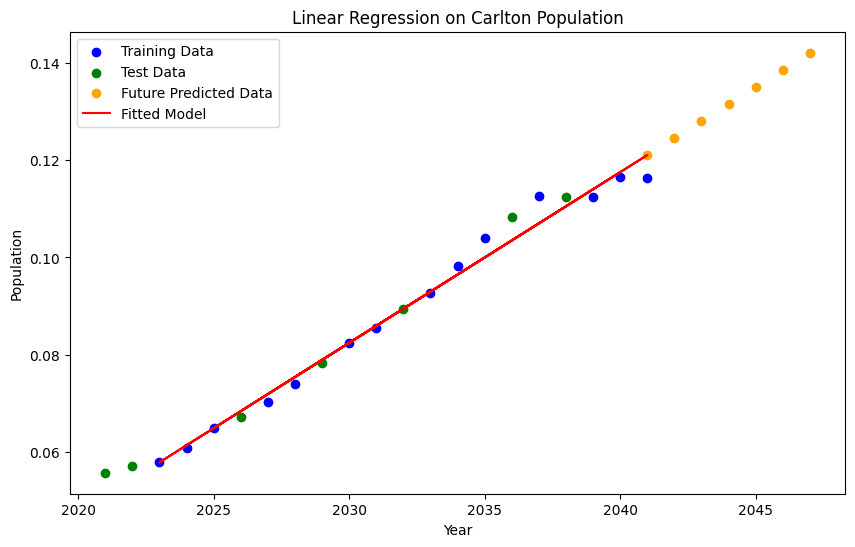

In [3767]:
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='blue', label='Training Data')
plt.scatter(x_test, y_test, color='green', label='Test Data')
plt.scatter(future_years, future_pred, color='orange', label='Future Predicted Data')
plt.plot(x_train, model.predict(x_train), color='red', label='Fitted Model')
plt.title('Linear Regression on Carlton Population')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.show()

<p><b>Code that goes through all cities</b></p>

In [3768]:
new_pop = new_pop.drop(columns="West Melbourne (Industrial)")  # as most data points are 0

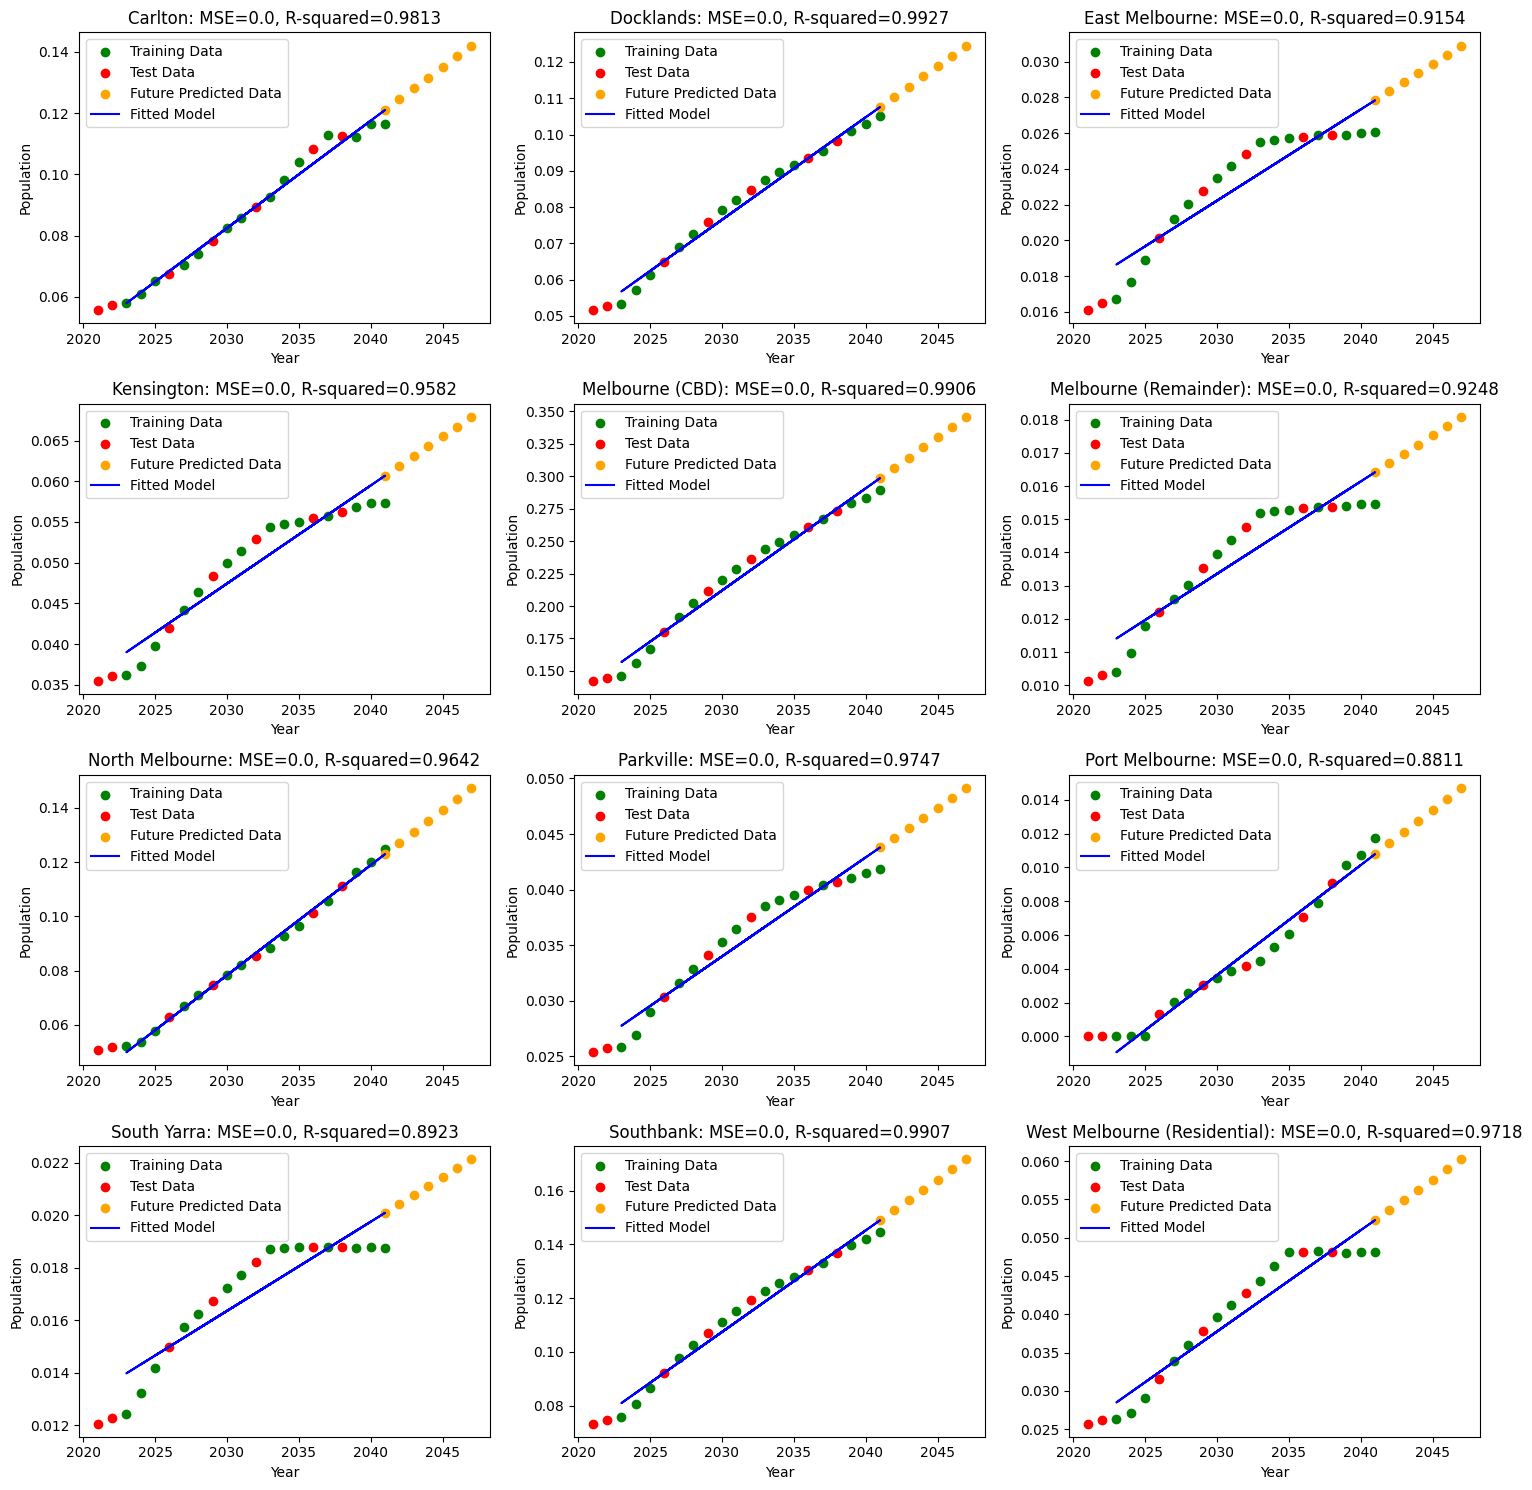

In [3769]:
city_names = list(new_pop.columns[1:])  # List of city names, excluding 'year'
metric_dict = {}
num_cities = len(city_names)

# for visualization 
cols = 3  # Number of columns in subplot grid
rows = (num_cities + cols - 1) // cols  # Calculate required number of rows

fig, axs = plt.subplots(rows, cols, figsize=(15, 15)) 
axs = axs.flatten()  # Flatten the axis array for easier indexing

for i, city in enumerate(city_names):
    data = new_pop.loc[:, ['year', city]]
    x = data['year'].values.reshape(-1, 1)
    y = data[city].values.reshape(-1, 1)

    # Split the data, 70 - 30 split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

    # Fit the model
    model = LinearRegression()
    model.fit(x_train, y_train)

    # Predict
    y_pred = model.predict(x_test)
    fit_line = model.predict(x_train)

    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    metric_dict[city] = (mse, r2)

    # Future predictions
    future_years = np.array(np.arange(2041, 2048)).reshape(-1, 1)
    future_pred = model.predict(future_years)

    # Plotting in subplot
    ax = axs[i]
    ax.scatter(x_train, y_train, color='green', label='Training Data')
    ax.scatter(x_test, y_test, color='red', label='Test Data')
    ax.scatter(future_years, future_pred, color='orange', label='Future Predicted Data')
    ax.plot(x_train, fit_line, color='blue', label='Fitted Model')
    ax.set_title(f'{city}: MSE={round(mse,4)}, R-squared={round(r2,4)}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Population')
    ax.legend()

# Disable unused subplots if number of cities is not a perfect multiple of cols*rows
for j in range(i + 1, len(axs)):
    axs[j].axis('off')

fig.tight_layout()  # Adjust layout to prevent overlap
plt.show()

<p><b>Key findings from the plot. </b></p>
<ul>
    <li><b>1.Model Accuracy:</b>The R-squared value accross all areas in the linear model shows a strong predictive power regarding how population will change with years. Most scatterpoints show a strong positive linear relationship.   </li><br>
    <li><b>2.MSE:</b>Most areas show 0 MSE values which suggest that there are little to no errors in between teh predicted and the actual values of the test set.  </li><br>
    <li><b>3. Model Fit:</b>Looking at the line of fit, it looks like there is good alignment between fitted model and both training and test data and future predictions. This shows that the model is well tuned to the historical trends and can reasonably provide accurate forecasts. </li><br>
    <li><b>4. Overall Trend:</b>All the areas show consistent increase in the population over time as the plot indicates the positive slope.  </li>
    
</ul>

<h3>Part B: Bus Stations Dataset</h3>

<h4> 1. DBSCAN (Density Based Spatial Clustering)   </h4>
<ul>
    <li> <b>Goal: </b>To identify clusters of existing bus stops. This helps in understanding how the bus stops are currently distributed. 
</li>
    <li><b>Benefits: </b>By understanding the overall distribution of the current bus stops we can located potential areas where new bus stops can be established.  </li>
</ul>

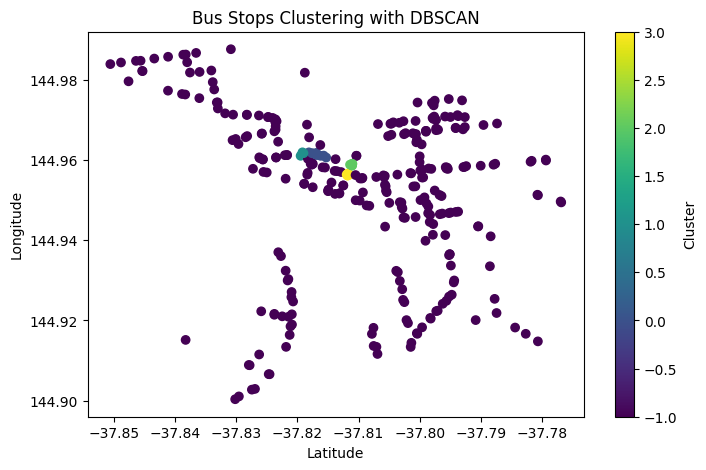

In [3777]:
from sklearn.cluster import DBSCAN

# fit the model
dbscan = DBSCAN(eps=0.001, min_samples=5)
bus['cluster'] = dbscan.fit_predict(bus[['lat_bus', 'lon_bus']])

# visualize
plt.figure(figsize=(8, 5))
plt.scatter(bus['lat_bus'], bus['lon_bus'], c=bus['cluster'], cmap='viridis', marker='o', label='Bus Stops')
plt.title('Bus Stops Clustering with DBSCAN')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.colorbar(label='Cluster')
plt.show()

In [3771]:
# pip install geopandas

In [3776]:
m = folium.Map(location=[bus['lat_bus'].mean(), bus['lon_bus'].mean()], zoom_start=13)

# Add bus stops to the map
for idx, row in bus.iterrows():
    folium.CircleMarker(
        location=[row['lat_bus'], row['lon_bus']],
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(m)

# Display the map
m.save('Bus_Stops_Map.html')
m


<h4> 1. Density and Distribution Analysis </h4>
<ul>
    <li> <b>Goal: </b>To understand the overall distributions of the bus stops accross different areas. 
</li>
    <li><b>Benefits:</b>The insights from this analysis will help us understand the areas that are underserved and in need of bus stops. It will also help us understand the distributions of bus stops based on density and demand. </li>
</ul>